In [5]:
import os
os.system("pip install kagglehub")

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

path = kagglehub.dataset_download("netflix-inc/netflix-prize-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ivan\.cache\kagglehub\datasets\netflix-inc\netflix-prize-data\versions\2


In [9]:
import os
os.system("pip install pandas")

In [11]:
import os
os.system("pip install unidecode")

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import re
from unidecode import unidecode
from glob import glob

In [5]:
# Función para limpiar texto
def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = unidecode(texto)  # Remueve tildes y caracteres especiales
        texto = re.sub(r"[^\w\s]", "", texto)  # Elimina signos de puntuación
        texto = re.sub(r"\s+", " ", texto).strip()  # Espacios extra
    return texto

In [1]:
import pandas as pd
from glob import glob

rating_files = glob("C:/Users/ivan/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/combined_data_*.txt")

output_file = "netflix_ratings_clean.csv"
max_movie_id = 250  # Límite de películas a procesar

with open(output_file, "w", encoding="utf-8") as out_file:
    out_file.write("movie_id,user_id,rating,date\n")

    for file in rating_files:
        movie_id = None
        with open(file, "r", encoding="utf-8") as f:
            for line in f:
                line = line.strip()
                if line.endswith(":"):
                    movie_id = int(line[:-1])
                    
                    if movie_id > max_movie_id:
                        print(f"Se alcanzó el límite: movie_id {max_movie_id}. Finalizando.")
                        break
                else:
                    if movie_id is not None and movie_id <= max_movie_id:
                        try:
                            user_id, rating, date = line.split(",")
                            out_file.write(f"{movie_id},{user_id},{rating},{date}\n")
                        except ValueError:
                            print(f"Error al procesar línea: {line}")

        if movie_id and movie_id > max_movie_id:
            break  

print("Archivo de calificaciones guardado en CSV sin problemas de memoria.")

Se alcanzó el límite: movie_id 250. Finalizando.
Archivo de calificaciones guardado en CSV sin problemas de memoria.


In [45]:
import pandas as pd

# Archivo de calificaciones procesado
file_path = "netflix_ratings_clean.csv"

# Definir el tamaño del chunk
chunk_size = 500000

# Contador de filas totales
total_rows = 0

# Leer el primer chunk para mostrarlo como DataFrame
first_chunk = next(pd.read_csv(file_path, chunksize=chunk_size))

# Mostrar las primeras 10 filas como DataFrame
print("Primeras 10 filas del DataFrame:")
print(first_chunk.head(10))

# Calcular el número total de filas sumando los tamaños de los chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    total_rows += len(chunk)

# Sumar las filas del primer chunk
total_rows += len(first_chunk)

print(f"\nEl archivo tiene un total de {total_rows:,} filas.")  

Primeras 10 filas del DataFrame:
   movie_id  user_id  rating        date
0         1  1488844       3  2005-09-06
1         1   822109       5  2005-05-13
2         1   885013       4  2005-10-19
3         1    30878       4  2005-12-26
4         1   823519       3  2004-05-03
5         1   893988       3  2005-11-17
6         1   124105       4  2004-08-05
7         1  1248029       3  2004-04-22
8         1  1842128       4  2004-05-09
9         1  2238063       3  2005-05-11

El archivo tiene un total de 1,573,342 filas.


In [53]:
# Cargar archivo de películas
df_movies = pd.read_csv("C:/Users/ivan/.cache/kagglehub/datasets/netflix-inc/netflix-prize-data/versions/2/movie_titles.csv", 
                        encoding="latin1", header=None, names=["movie_id", "year", "title"], delimiter=",", on_bad_lines='skip')

# Filtrar solo hasta movie_id 250
df_movies = df_movies[df_movies['movie_id'] <= 250]

# Rellenar los valores NaN en la columna 'year' con 0 y convertir a entero
df_movies['year'] = df_movies['year'].fillna(0)
df_movies['year'] = df_movies['year'].astype(int)

# Limpiar los títulos de películas
df_movies["title"] = df_movies["title"].apply(limpiar_texto)

# Guardar el archivo limpio
df_movies.to_csv("movie_titles_clean.csv", index=False)

print("Archivo de títulos de películas procesado y guardado.")

Archivo de títulos de películas procesado y guardado.


In [55]:
print(df_movies.head(10))
print(df_movies.shape)

   movie_id  year                       title
0         1  2003             Dinosaur Planet
1         2  2004  Isle of Man TT 2004 Review
2         3  1997                   Character
3         4  1994   Paula Abduls Get Up Dance
4         5  2004    The Rise and Fall of ECW
5         6  1997                        Sick
6         7  1992                       8 Man
7         8  2004         What the Do We Know
8         9  1991     Class of Nuke Em High 2
9        10  2001                     Fighter
(249, 3)


In [119]:
import pandas as pd

# Cargar archivo de películas
df_movies = pd.read_csv("movie_titles_clean.csv")

# Cargar archivo de ratings
df_ratings = pd.read_csv("netflix_ratings_clean.csv")

# Calcular el rating promedio por película
avg_ratings = df_ratings.groupby('movie_id')['rating'].mean().reset_index()
avg_ratings.columns = ['movie_id', 'avg_rating']  

# Hacer el merge para agregar el título de la película y el rating promedio
df_final = pd.merge(df_movies[['movie_id', 'title']], avg_ratings, on='movie_id', how='inner')

# Eliminar posibles duplicados
df_final = df_final.drop_duplicates(subset=['movie_id'])

# Archivo de salida
output_file_final = "netflix_ratings_with_avg_titles.csv"

# Guardar el archivo con las columnas 'movie_id', 'title' y 'avg_rating'
df_final.to_csv(output_file_final, index=False, columns=['movie_id', 'title', 'avg_rating'])

print("Archivo final con títulos de películas y rating promedio guardado correctamente.")

Archivo final con títulos de películas y rating promedio guardado correctamente.


In [5]:
df_final = pd.read_csv("netflix_ratings_with_avg_titles.csv")

print(df_final.columns)
print(df_final.head(10))
print("Total de filas:", len(df_final))

Index(['movie_id', 'title', 'avg_rating'], dtype='object')
   movie_id                       title  avg_rating
0         1             Dinosaur Planet    3.749543
1         2  Isle of Man TT 2004 Review    3.558621
2         3                   Character    3.641153
3         4   Paula Abduls Get Up Dance    2.739437
4         5    The Rise and Fall of ECW    3.919298
5         6                        Sick    3.084396
6         7                       8 Man    2.129032
7         8         What the Do We Know    3.189805
8         9     Class of Nuke Em High 2    2.621053
9        10                     Fighter    3.180723
Total de filas: 249


In [12]:
import os
os.system("pip install spacy")

Note: you may need to restart the kernel to use updated packages.


In [14]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import os
os.system("pip install flask")

0

In [3]:
from flask import Flask, request, jsonify, render_template
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

app = Flask(__name__)

# Cargar datos
ratings_df = pd.read_csv("netflix_ratings_clean.csv")
movies_df = pd.read_csv("movie_titles_clean.csv")
movies_avg_df = pd.read_csv("netflix_ratings_with_avg_titles.csv")

# Crear matriz usuario-película
user_matrix = ratings_df.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)

# Dividir en entrenamiento y prueba
train_data, _ = train_test_split(ratings_df, test_size=0.2, random_state=42)
train_matrix = train_data.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)

# Entrenar modelo KNN
model_knn = NearestNeighbors(metric="cosine", algorithm="brute")
model_knn.fit(train_matrix)

# Función para recomendar películas
def recomendar_peliculas_usuario(user_id, n=5):
    user_id = int(user_id)
    if user_id not in train_matrix.index:
        return {"error": f"Usuario {user_id} no encontrado."}

    distances, indices = model_knn.kneighbors([train_matrix.loc[user_id]], n_neighbors=n+1)
    similar_users = train_matrix.index[indices.flatten()][1:]

    similar_users_ratings = train_matrix.loc[similar_users].mean(axis=0)
    recommended_movies = similar_users_ratings.sort_values(ascending=False).index[:n]

    recommendations = movies_avg_df[movies_avg_df["movie_id"].isin(recommended_movies)][["title", "avg_rating"]]
    recommendations = recommendations.sort_values(by="avg_rating", ascending=False)

    return recommendations.to_dict(orient="records")

# Ruta para la página principal
@app.route("/")
def home():
    return render_template("index.html")

# Ruta para recibir la solicitud del usuario
@app.route("/recomendar", methods=["POST"])
def recomendar():
    data = request.json
    user_id = data.get("user_id")
    
    if not user_id:
        return jsonify({"error": "Debe ingresar un User ID."})

    try:
        recomendaciones = recomendar_peliculas_usuario(user_id)
        return jsonify(recomendaciones)
    except ValueError:
        return jsonify({"error": "User ID inválido."})

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\ivan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
# Ejecutar lo siguiente en anaconda prompt
# jupyter nbconvert --to script MovieWatchIA.ipynb
# python MovieWatchIA.py

# Crear una carpeta llamada "templates" en la ruta C:\Users\SuUsuario
# Colocar dentro el archivo "index.html"

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
from sklearn.metrics.pairwise import cosine_similarity

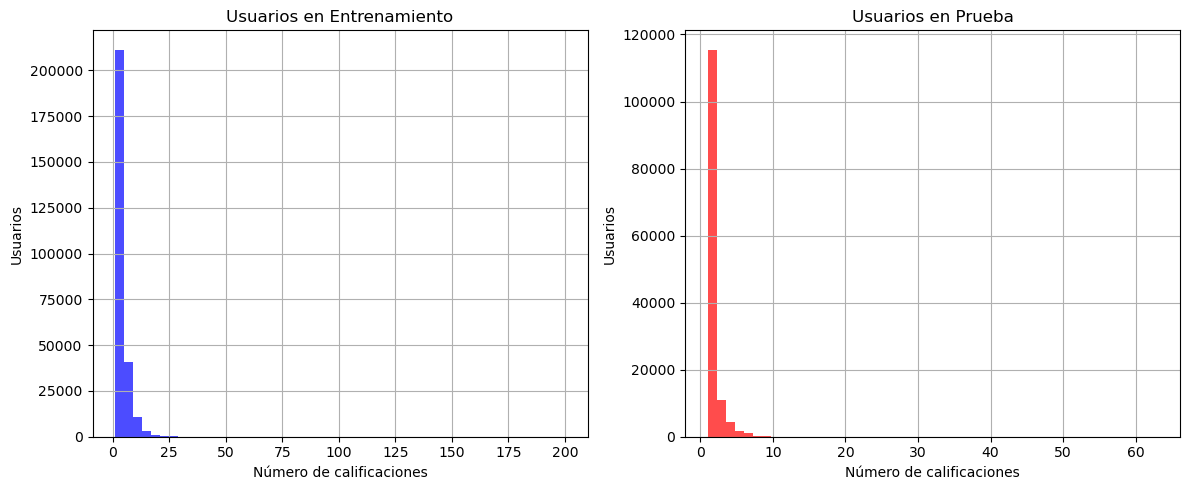

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_data["user_id"].value_counts().hist(bins=50, color="blue", alpha=0.7)
plt.xlabel("Número de calificaciones")
plt.ylabel("Usuarios")
plt.title("Usuarios en Entrenamiento")

plt.subplot(1, 2, 2)
test_data["user_id"].value_counts().hist(bins=50, color="red", alpha=0.7)
plt.xlabel("Número de calificaciones")
plt.ylabel("Usuarios")
plt.title("Usuarios en Prueba")

plt.tight_layout()
plt.show()

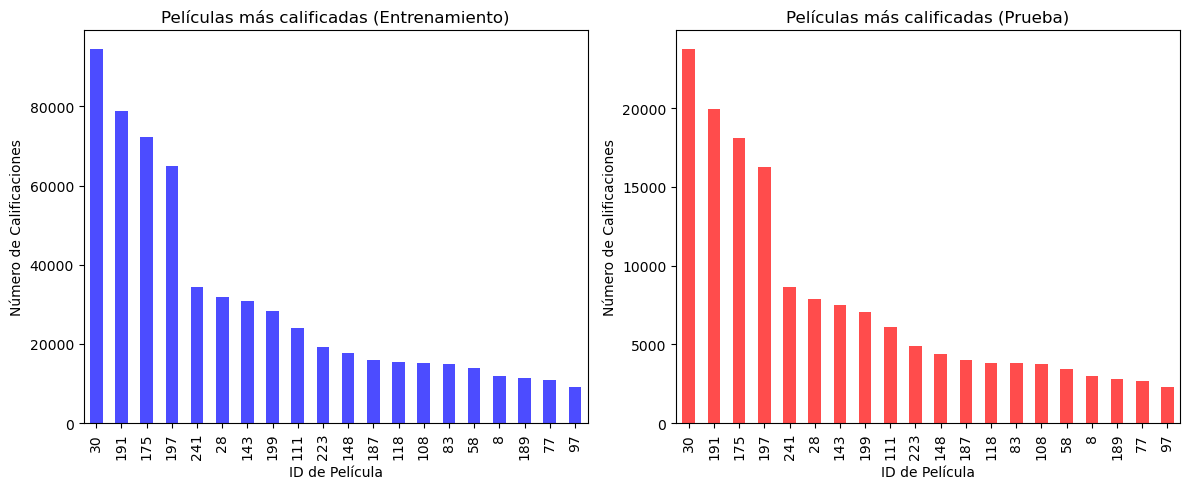

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_data["movie_id"].value_counts().head(20).plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("ID de Película")
plt.ylabel("Número de Calificaciones")
plt.title("Películas más calificadas (Entrenamiento)")

plt.subplot(1, 2, 2)
test_data["movie_id"].value_counts().head(20).plot(kind="bar", color="red", alpha=0.7)
plt.xlabel("ID de Película")
plt.ylabel("Número de Calificaciones")
plt.title("Películas más calificadas (Prueba)")

plt.tight_layout()
plt.show()

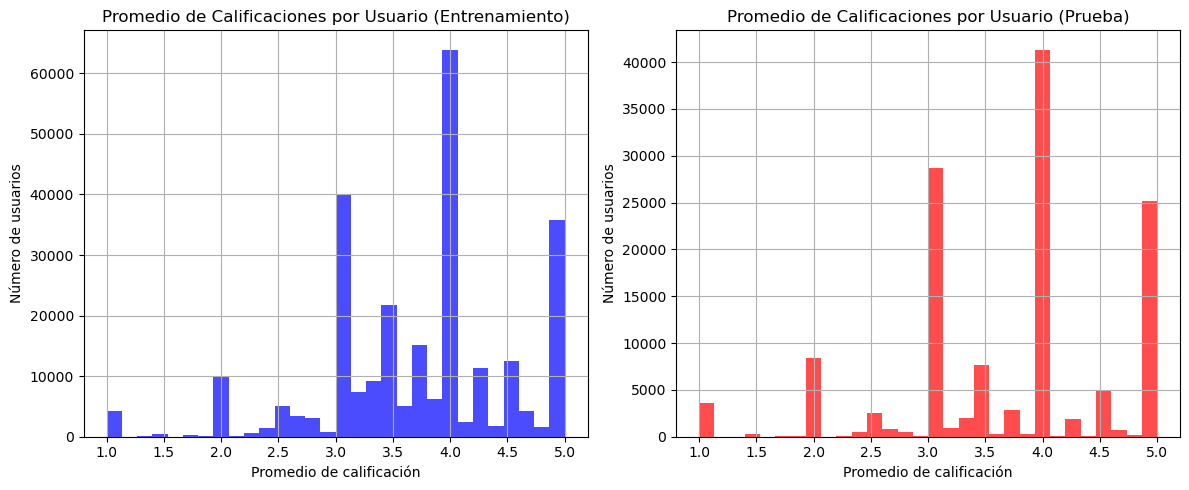

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_data.groupby("user_id")["rating"].mean().hist(bins=30, color="blue", alpha=0.7)
plt.xlabel("Promedio de calificación")
plt.ylabel("Número de usuarios")
plt.title("Promedio de Calificaciones por Usuario (Entrenamiento)")

plt.subplot(1, 2, 2)
test_data.groupby("user_id")["rating"].mean().hist(bins=30, color="red", alpha=0.7)
plt.xlabel("Promedio de calificación")
plt.ylabel("Número de usuarios")
plt.title("Promedio de Calificaciones por Usuario (Prueba)")

plt.tight_layout()
plt.show()

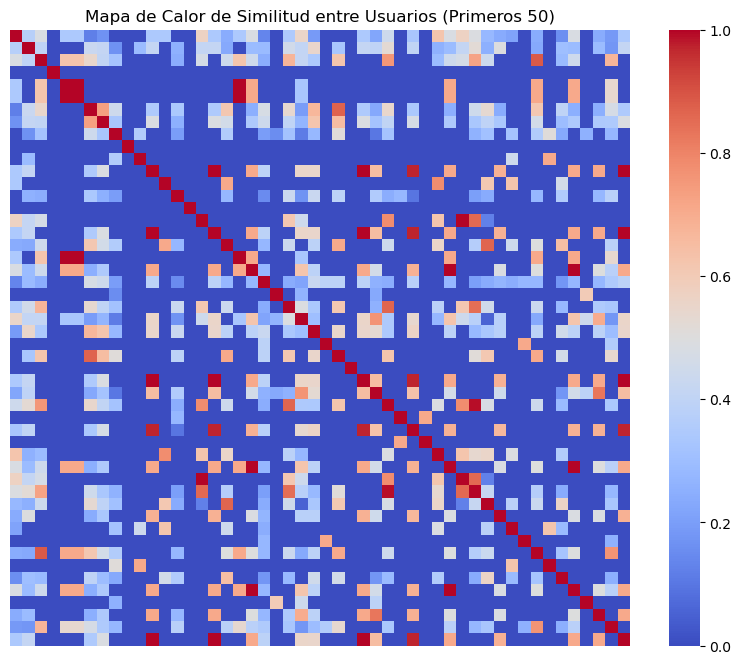

In [23]:
train_sparse = sp.csr_matrix(train_matrix)

user_similarity = cosine_similarity(train_sparse[:50, :])

plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Mapa de Calor de Similitud entre Usuarios (Primeros 50)")
plt.show()

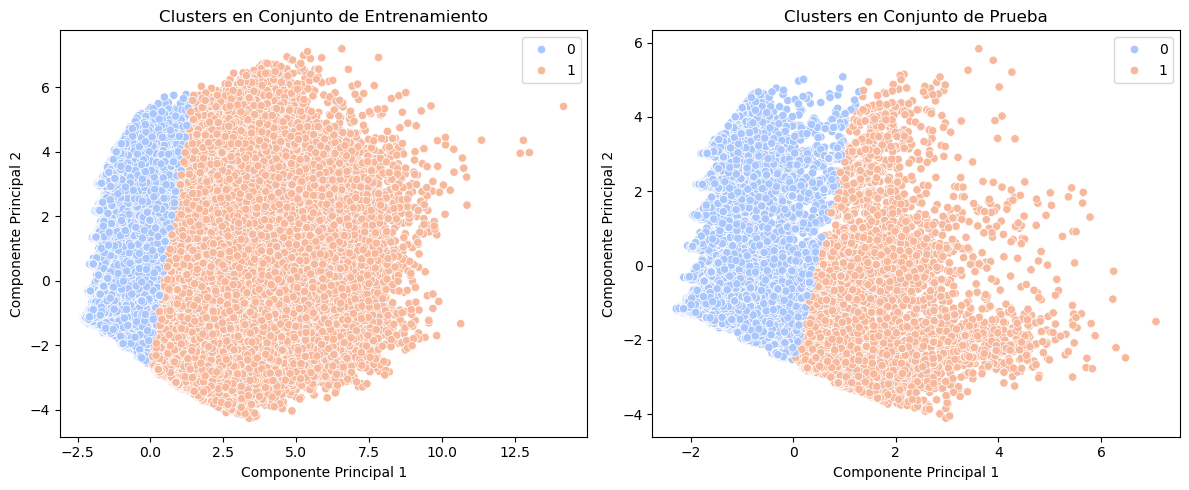

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_matrix)
test_pca = pca.transform(test_matrix)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(train_pca)
test_clusters = kmeans.predict(test_pca)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train_clusters, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clusters en Conjunto de Entrenamiento")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")

sns.scatterplot(x=test_pca[:, 0], y=test_pca[:, 1], hue=test_clusters, palette="coolwarm", ax=axes[1])
axes[1].set_title("Clusters en Conjunto de Prueba")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

plt.tight_layout()
plt.show()

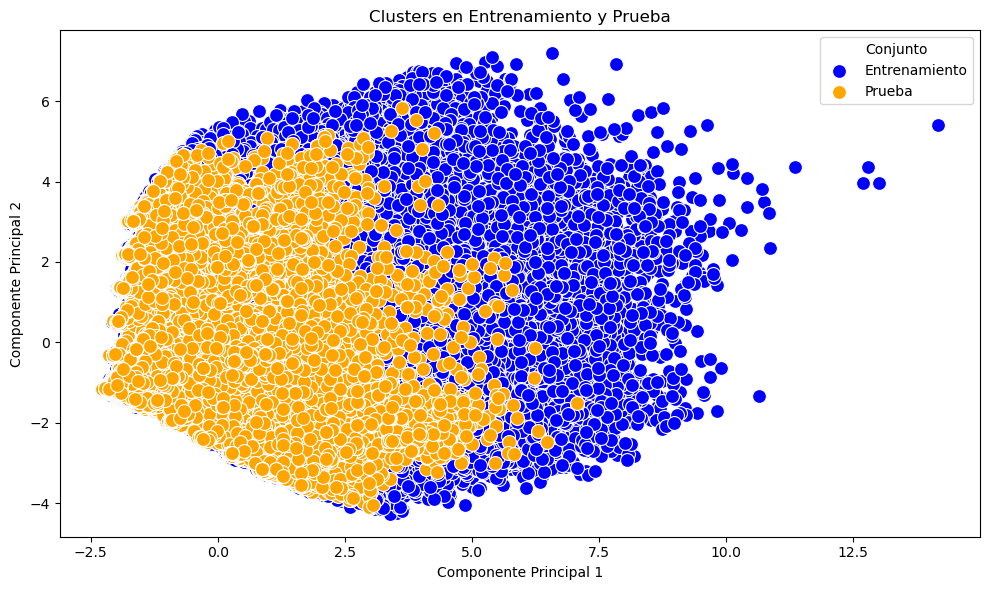

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_matrix)
test_pca = pca.transform(test_matrix)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(train_pca)
test_clusters = kmeans.predict(test_pca)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], color="blue", label="Entrenamiento", s=100)

sns.scatterplot(x=test_pca[:, 0], y=test_pca[:, 1], color="orange", label="Prueba", s=100)

plt.title("Clusters en Entrenamiento y Prueba")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Conjunto")

plt.tight_layout()
plt.show()